In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import ast


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 200)

In [3]:
raw_df = pd.read_csv("../data/raw/datasheet.csv")

In [4]:
print(raw_df.columns)

Index(['brand', 'name', 'type', 'country', 'ingridients', 'afterUse'], dtype='object')


In [5]:
raw_df.head()


,brand,name,type,country,ingridients,afterUse
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea"
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger"
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Dimethyl Isosorbide,Tamarindus Indica Seed Gum,Xanthan Gum,Isoceteth-20,Ethoxydiglycol,Phenoxyethanol,Chlorphenesin","Good For Oily Skin,Redness Reducing,Acne Fighting,Brightening,Irritating"
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating"
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Methyl Isethionate,Sodium Chloride,Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract,Butylene Glycol,Saccharomyces Ferment,Cryptomeria Japonica ...","Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating"


# 1. Raw Product Data – Exploration & Cleaning

- Exploring the raw product dataset, identify data quality issues, and produce a cleaned version for downstream analysis down the line... i was also thinking too much inside my head.... so i will start here and see what is the next possible action and what is reachable for this project. Scope wise , as a single student. 

In [6]:
df = raw_df.copy()


## Column Renaming Semantics

Some column names in the raw dataset are ambiguous or inconsistent with
skincare industry terminology. To improve clarity while preserving data
provenance, columns are renamed only in the working copy of the dataset.


In [7]:
df = df.rename(columns={
    "ingridients": "inci_raw",
    "afterUse": "claimed_concerns_raw"
})


In [8]:
print(df.columns)
print(df.shape)


Index(['brand', 'name', 'type', 'country', 'inci_raw', 'claimed_concerns_raw'], dtype='object')
(19050, 6)


In [9]:
df.head()

,brand,name,type,country,inci_raw,claimed_concerns_raw
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea"
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger"
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Dimethyl Isosorbide,Tamarindus Indica Seed Gum,Xanthan Gum,Isoceteth-20,Ethoxydiglycol,Phenoxyethanol,Chlorphenesin","Good For Oily Skin,Redness Reducing,Acne Fighting,Brightening,Irritating"
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating"
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Methyl Isethionate,Sodium Chloride,Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract,Butylene Glycol,Saccharomyces Ferment,Cryptomeria Japonica ...","Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating"


## Column-Level Overview
This section explores each column individually to understand cardinality,
missing values, and semantic relevance before any transformations.


In [10]:
column_overview = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.values,
    "non_null_count": df.notna().sum().values,
    "null_count": df.isna().sum().values,
    "unique_values": df.nunique().values
})

column_overview.sort_values("unique_values", ascending=False)


,column,dtype,non_null_count,null_count,unique_values
1,name,object,19050,0,18688
4,inci_raw,object,18731,319,18171
5,claimed_concerns_raw,object,17526,1524,2970
0,brand,object,19050,0,2224
3,country,object,17218,1832,70
2,type,object,19035,15,36


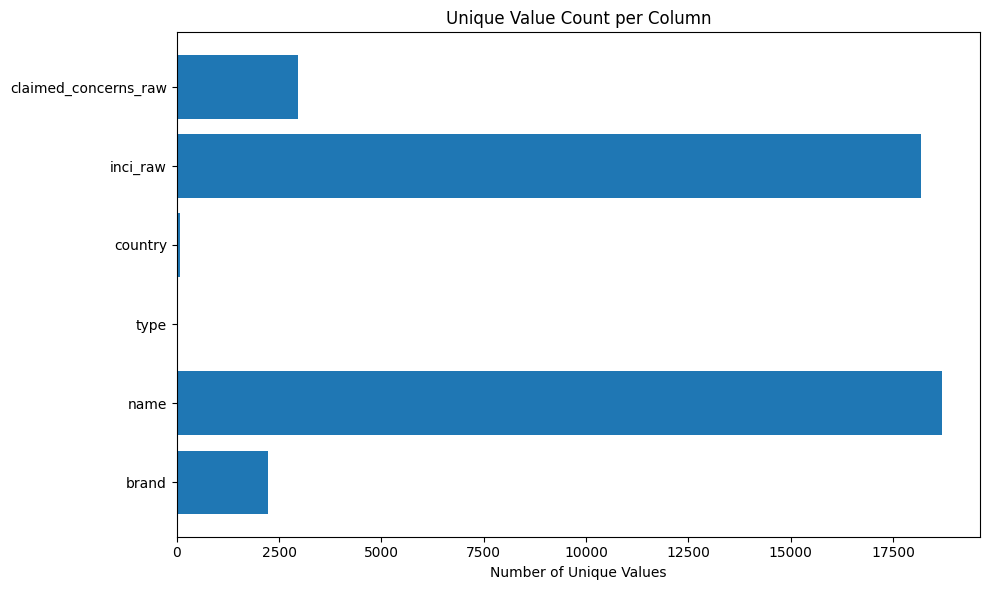

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(column_overview["column"], column_overview["unique_values"])
plt.xlabel("Number of Unique Values")
plt.title("Unique Value Count per Column")
plt.tight_layout()
plt.show()


## Product Type Exploration
This section explores the `type` column to understand how products
are categorized in the raw dataset.


In [12]:
df["type"].value_counts(dropna=False)


type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Bath & Body            1134
Toner                   967
Facial Treatment        861
Face Makeup             818
Eye Moisturizer         662
Exfoliator              586
Makeup Remover          564
Wet Mask                559
Sheet Mask              550
Other Haircare          460
Lip Moisturizer         421
Eye Makeup              416
Day Moisturizer         354
Oil                     354
Night Moisturizer       321
Essence                 298
Shampoo                 295
Tool                    250
Overnight Mask          198
Lip Makeup              191
Conditioner             184
Fragrance               169
Hand Care               156
Eye Mask                121
Makeup Applicator       115
Nail Care               110
Cheek Makeup            106
Tanning                 104
Lip Mask                 94
Emulsion                 65
NaN                      15
False Eyelash  

In [13]:
df["type"].nunique()


36

In [14]:
SKINCARE_TYPES = [
    "Serum",
    "General Moisturizer",
    "Day Moisturizer",
    "Night Moisturizer",
    "Eye Moisturizer",
    "Face Cleanser",
    "Toner",
    "Essence",
    "Emulsion",
    "Facial Treatment",
    "Exfoliator",
    "Oil",
    "Sunscreen",
    "Overnight Mask",
    "Wet Mask",
    "Sheet Mask",
    "Eye Mask",
    "Lip Moisturizer",
    "Lip Mask"
]


In [15]:
df = df[df["type"].isin(SKINCARE_TYPES)].copy()

In [16]:
df["type"].value_counts()



type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Toner                   967
Facial Treatment        861
Eye Moisturizer         662
Exfoliator              586
Wet Mask                559
Sheet Mask              550
Lip Moisturizer         421
Day Moisturizer         354
Oil                     354
Night Moisturizer       321
Essence                 298
Overnight Mask          198
Eye Mask                121
Lip Mask                 94
Emulsion                 65
Name: count, dtype: int64

In [17]:
df.shape

(13959, 6)

In [18]:
CORE_SKINCARE_TYPES = [
    "Serum",
    "General Moisturizer",
    "Day Moisturizer",
    "Night Moisturizer",
    "Face Cleanser",
    "Toner",
    "Exfoliator",
    "Sunscreen"
]


In [19]:
df = df[df["type"].isin(CORE_SKINCARE_TYPES)].copy()


In [20]:
df["type"].value_counts()


type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Toner                   967
Exfoliator              586
Day Moisturizer         354
Night Moisturizer       321
Name: count, dtype: int64

In [21]:
df.shape


(9776, 6)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9776 entries, 0 to 19047
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   brand                 9776 non-null   object
 1   name                  9776 non-null   object
 2   type                  9776 non-null   object
 3   country               8958 non-null   object
 4   inci_raw              9756 non-null   object
 5   claimed_concerns_raw  9328 non-null   object
dtypes: object(6)
memory usage: 534.6+ KB


In [23]:
df.describe(include="object").T


,count,unique,top,freq
brand,9776,1547,Neutrogena,163
name,9776,9571,Vitamin C Serum,23
type,9776,8,Serum,2345
country,8958,65,United States,3210
inci_raw,9756,9607,"Water,Butylene Glycol,Glycerin,Caprylyl Methicone,Pentylene Glycol,1,2-Hexanediol,Chlorella Vulgaris Extract,Malachite Extract,Bifida Ferment Filtrate,Bifida Ferment Lysate,Lactobacillus Ferment L...",5
claimed_concerns_raw,9328,2291,"Reduces Large Pores,Drying,Irritating",136


In [24]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

df.columns


Index(['brand', 'name', 'type', 'country', 'inci_raw', 'claimed_concerns_raw'], dtype='object')

In [25]:
missing = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame("missing_ratio")
)

missing


,missing_ratio
country,0.083674
claimed_concerns_raw,0.045827
inci_raw,0.002046
brand,0.000000
name,0.000000
type,0.000000


## EDA Conclusion

The dataset contains 10,438 skincare products with a limited number of structured columns. Core product information such as brand, product name, type, and ingredient lists is largely complete. The `inci_raw` column is available for almost all products and forms the primary basis for an ingredient-driven recommendation system.

In addition, the `claimed_concerns_raw` column provides valuable product-level information about the intended skin concerns. Although this information is not always present and may be subjective, it offers useful contextual signals that can support product matching and comparison.

Overall, the dataset is suitable for further cleaning and transformation, with both ingredients and claimed concerns playing an important role in the next stages of the SkinGen system.


## Next Steps

The next step focuses on cleaning and structuring the dataset for modeling purposes. This includes:

- Removing products without ingredient lists
- Normalizing text-based columns for consistency
- Structuring ingredient lists into machine-readable formats
- Cleaning and parsing claimed skin concerns into structured labels
- Reducing the dataset to core skincare product categories

These steps prepare the data for an explainable, content-based recommendation approach that combines ingredient intelligence with product intent.


## Claimed Concerns

In [26]:
df["claimed_concerns"] = (
    df["claimed_concerns_raw"]
      .str.lower()
      .str.replace("-", "_", regex=False)
      .str.replace(" ", "_", regex=False)
      .str.strip()
      .str.split(",")
)


In [27]:
def clean_claimed_concerns(concerns):
    if not isinstance(concerns, list):
        return concerns

    cleaned = []
    for c in concerns:
        cleaned.append(c.strip())

    return cleaned


In [28]:
df["claimed_concerns"] = df["claimed_concerns"].apply(clean_claimed_concerns)


In [29]:
df[["claimed_concerns_raw", "claimed_concerns"]].head()


,claimed_concerns_raw,claimed_concerns
0,"Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea","[good_for_oily_skin, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating, rosacea]"
1,"Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger","[good_for_oily_skin, redness_reducing, reduces_irritation, anti_aging, acne_fighting, brightening, drying, acne_trigger]"
3,"Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating","[redness_reducing, reduces_irritation, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating]"
4,"Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating","[good_for_oily_skin, reduces_irritation, reduces_large_pores, drying, acne_trigger, irritating]"
5,"Good For Oily Skin,Redness Reducing,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger","[good_for_oily_skin, redness_reducing, anti_aging, acne_fighting, brightening, drying, acne_trigger]"


Claimed concerns were normalized to a consistent snake_case format and stored as multi-label lists, enabling reliable aggregation and comparison in later analysis stages.

In [30]:
all_claimed_concerns = []

for concerns in df["claimed_concerns"]:
    if isinstance(concerns, list):
        for c in concerns:
            all_claimed_concerns.append(c)


In [31]:
claimed_concern_counts = pd.Series(all_claimed_concerns).value_counts()

claimed_concern_counts.head(10)


brightening            6749
irritating             5968
anti_aging             5310
drying                 4517
redness_reducing       4485
acne_trigger           4047
good_for_oily_skin     3969
reduces_large_pores    3815
eczema                 3419
scar_healing           3362
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Claimed Skin Concerns'}>

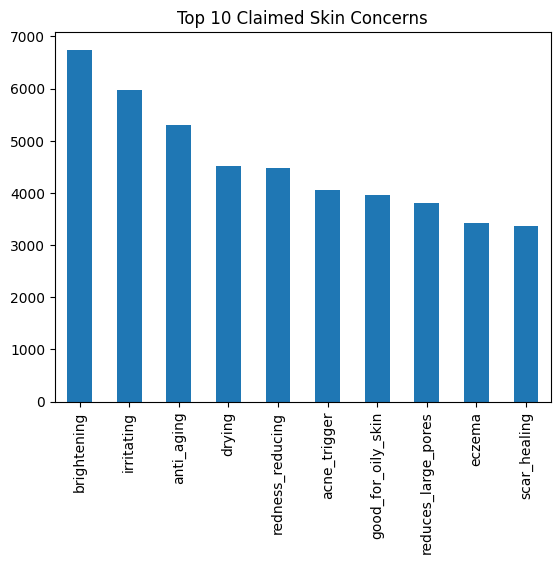

In [32]:
claimed_concern_counts.head(10).plot(
    kind="bar",
    title="Top 10 Claimed Skin Concerns"
)


To analyze how often each skin concern is claimed, the lists of claimed concerns were flattened into a single list. 
Each concern was then counted to observe which claims appear most frequently across products.
The frequency analysis shows that certain skin concerns such as brightening, anti-aging, and acne-related claims appear very frequently across products. This indicates strong marketing focus and potential over-claiming, which can later be compared to ingredient-based evidence.


In [33]:
unique_claimed_concerns = (
    df["claimed_concerns"]
      .dropna()
      .explode()
      .unique()
)

unique_claimed_concerns


array(['good_for_oily_skin', 'skin_texture', 'reduces_large_pores',
       'anti_aging', 'dark_spots', 'brightening', 'drying',
       'acne_trigger', 'irritating', 'rosacea', 'redness_reducing',
       'reduces_irritation', 'acne_fighting', 'scar_healing',
       'may_worsen_oily_skin', 'hydrating', 'eczema'], dtype=object)

In [34]:
unique_claimed_concerns.shape

(17,)

In [35]:
positive_concerns = {
    "brightening",
    "anti_aging",
    "dark_spots",
    "hydrating",
    "acne_fighting",
    "scar_healing",
    "skin_texture",
    "reduces_large_pores",
    "redness_reducing",
    "reduces_irritation",
    "good_for_oily_skin"
}
negative_concerns = {
    "drying",
    "irritating",
    "acne_trigger",
    "may_worsen_oily_skin"
}
condition_concerns = {
    "rosacea",
    "eczema"
}



In [36]:
df_exploded = df[["claimed_concerns"]].explode("claimed_concerns")


In [37]:
df_exploded["positive_claims"] = df_exploded["claimed_concerns"].isin(positive_concerns)
df_exploded["negative_claims"] = df_exploded["claimed_concerns"].isin(negative_concerns)
df_exploded["condition_claims"] = df_exploded["claimed_concerns"].isin(condition_concerns)


concern positive / negative / condition-related ; boolean flags (very clear)

In [38]:
claim_counts = (
    df_exploded
    .groupby(df_exploded.index)[
        ["positive_claims", "negative_claims", "condition_claims"]
    ]
    .sum()
)
claim_counts


,positive_claims,negative_claims,condition_claims
0,6,3,1
1,6,2,0
3,7,3,0
4,3,3,0
5,5,2,0
...,...,...,...
19042,7,2,0
19043,0,0,0
19044,6,2,2
19045,4,2,0


In [39]:
df = df.join(claim_counts)
def ensure_list(x):
    if isinstance(x, np.ndarray):
        return list(x)
    return x

df["claimed_concerns"] = df["claimed_concerns"].apply(ensure_list)

In [40]:
df["claimed_concerns"].apply(type).value_counts()


claimed_concerns
<class 'list'>     9328
<class 'float'>     448
Name: count, dtype: int64

In [41]:
df[[
    "claimed_concerns",
    "positive_claims",
    "negative_claims",
    "condition_claims"
]].head()


,claimed_concerns,positive_claims,negative_claims,condition_claims
0,"[good_for_oily_skin, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating, rosacea]",6,3,1
1,"[good_for_oily_skin, redness_reducing, reduces_irritation, anti_aging, acne_fighting, brightening, drying, acne_trigger]",6,2,0
3,"[redness_reducing, reduces_irritation, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating]",7,3,0
4,"[good_for_oily_skin, reduces_irritation, reduces_large_pores, drying, acne_trigger, irritating]",3,3,0
5,"[good_for_oily_skin, redness_reducing, anti_aging, acne_fighting, brightening, drying, acne_trigger]",5,2,0


Claimed concerns were aggregated per product into positive, negative, and condition-related claim counts, providing structured claim-based features for further analysis.


In [42]:
# df.to_csv("../data/cleaned/skingen_products_claims_clean.csv", index=False)
df.to_parquet("../data/cleaned/skingen_products_claims_clean.parquet")



## further cleaning 

Step 1 : Drop products without INCI

In [43]:
# df = pd.read_csv("../data/cleaned/skingen_products_claims_clean.csv")
df = pd.read_parquet("../data/cleaned/skingen_products_claims_clean.parquet")

In [44]:
df["claimed_concerns"].apply(type).value_counts()

claimed_concerns
<class 'numpy.ndarray'>    9328
<class 'NoneType'>          448
Name: count, dtype: int64

In [45]:
df.head()

,brand,name,type,country,inci_raw,claimed_concerns_raw,claimed_concerns,positive_claims,negative_claims,condition_claims
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea","[good_for_oily_skin, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating, rosacea]",6,3,1
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger","[good_for_oily_skin, redness_reducing, reduces_irritation, anti_aging, acne_fighting, brightening, drying, acne_trigger]",6,2,0
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating","[redness_reducing, reduces_irritation, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating]",7,3,0
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Methyl Isethionate,Sodium Chloride,Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract,Butylene Glycol,Saccharomyces Ferment,Cryptomeria Japonica ...","Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating","[good_for_oily_skin, reduces_irritation, reduces_large_pores, drying, acne_trigger, irritating]",3,3,0
5,La Roche-Posay,Toleriane Purifying Foaming Face Cleanser,Face Cleanser,France,"Water,Glycerin,Coco-Betaine,Propylene Glycol,Sodium Cocoyl Glycinate,Peg-120 Methyl Glucose Dioleate,Sodium Chloride,Ceramide NP,Niacinamide,Sodium Hydroxide,Disodium EDTA,Capryloyl Glycine,Capryl...","Good For Oily Skin,Redness Reducing,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger","[good_for_oily_skin, redness_reducing, anti_aging, acne_fighting, brightening, drying, acne_trigger]",5,2,0


In [46]:
df = df.dropna(subset=["inci_raw"]).copy()



Step 2 : Normalize product type

In [47]:
df["type"] = df["type"].str.lower().str.strip()


Step 3 : Light INCI normalization

In [48]:
df["inci_clean"] = (
    df["inci_raw"]
      .str.replace(";", ",", regex=False)
      .str.replace(r"(?<!\d),(?!\d)", ", ", regex=True)  # normalize separators
      .str.replace(r"(\d),\s+(\d)", r"\1,\2", regex=True)  # fix numeric commas
      .str.strip()
)


In [49]:
df["ingredient_list"] = df["inci_clean"].str.split(", ")


In [50]:
def split_glued_ingredients(lst):
    fixed = []
    for ing in lst:
        # split only if ingredients are incorrectly glued together
        if "," in ing and not ing.strip().startswith(tuple("0123456789")):
            parts = ing.split(",")
            fixed.extend([p.strip() for p in parts if p.strip()])
        else:
            fixed.append(ing)
    return fixed

df["ingredient_list"] = df["ingredient_list"].apply(split_glued_ingredients)


In [51]:
#Remove standalone numeric tokens from ingredient_list
# explode to one ingredient per row
df_exploded = df["ingredient_list"].explode()
df_exploded = df_exploded[
    ~df_exploded.str.strip().str.fullmatch(r"\d+")
]

# --- Reassemble ---
df["ingredient_list"] = (
    df_exploded
    .groupby(df_exploded.index)
    .apply(list)
)



In [52]:
df["ingredient_count"] = df["ingredient_list"].str.len()


In [53]:
df["brand"] = df["brand"].str.strip()
df["name"] = df["name"].str.strip()
df["country"] = df["country"].str.strip()


In [54]:
df.head(3)

,brand,name,type,country,inci_raw,claimed_concerns_raw,claimed_concerns,positive_claims,negative_claims,condition_claims,inci_clean,ingredient_list,ingredient_count
0,The Ordinary,Glycolic Acid 7% Toning Solution,toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea","[good_for_oily_skin, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating, rosacea]",6,3,1,"Water, Glycolic Acid, Rosa Damascena Flower Water, Centaurea Cyanus Flower Water, Aloe Barbadensis Leaf Water, Propanediol, Glycerin, Triethanolamine, Aminomethyl Propanol, Panax Ginseng Root Extr...","[Water, Glycolic Acid, Rosa Damascena Flower Water, Centaurea Cyanus Flower Water, Aloe Barbadensis Leaf Water, Propanediol, Glycerin, Triethanolamine, Aminomethyl Propanol, Panax Ginseng Root Ext...",42
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,face cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger","[good_for_oily_skin, redness_reducing, reduces_irritation, anti_aging, acne_fighting, brightening, drying, acne_trigger]",6,2,0,"Water, Glycerin, Pentaerythrityl Tetraethylhexanoate, Propylene Glycol, Ammonium Polyacryloyldimethyl Taurate, Polysorbate 60,Ceramide NP, Niacinamide, Sodium Chloride, Coco-Betaine, Disodium EDTA...","[Water, Glycerin, Pentaerythrityl Tetraethylhexanoate, Propylene Glycol, Ammonium Polyacryloyldimethyl Taurate, Polysorbate 60, Ceramide NP, Niacinamide, Sodium Chloride, Coco-Betaine, Disodium ED...",15
3,Youth To The People,Superfood Antioxidant Cleanser,face cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating","[redness_reducing, reduces_irritation, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating]",7,3,0,"Water, Cocamidopropyl Hydroxysultaine, Sodium Cocoyl Glutamate, Sorbeth-230 Tetraoleate, Polysorbate 20,Sodium Chloride, Aloe Barbadensis Leaf Juice Powder, Brassica Oleracea Acephala Leaf Extract...","[Water, Cocamidopropyl Hydroxysultaine, Sodium Cocoyl Glutamate, Sorbeth-230 Tetraoleate, Polysorbate 20, Sodium Chloride, Aloe Barbadensis Leaf Juice Powder, Brassica Oleracea Acephala Leaf Extra...",35


In [55]:
any("1,2-Hexanediol" in ing for ing in df["ingredient_list"].explode())


True

In [56]:
"1,2-Hexanediol" in df["ingredient_list"].explode().unique()


True

In [57]:
df[
    df["ingredient_list"]
    .explode()
    .str.strip()
    .str.fullmatch(r"\d+")
    .fillna(False)
].shape


C:\Users\elias\AppData\Local\Temp\ipykernel_44476\3202689966.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[


(0, 13)

In [58]:
df[
    df["ingredient_list"]
    .explode()
    .str.strip()
    .str.fullmatch(r"\d+")
    .fillna(False)
]


C:\Users\elias\AppData\Local\Temp\ipykernel_44476\1789506141.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[


,brand,name,type,country,inci_raw,claimed_concerns_raw,claimed_concerns,positive_claims,negative_claims,condition_claims,inci_clean,ingredient_list,ingredient_count


In [59]:
sorted(
    ing for ing in df["ingredient_list"].explode().unique()
    if "Hexanediol" in ing
)


['1,2-Hexanediol',
 '1,2-Hexanediol 19%',
 '1,2-Hexanediol 2%',
 '2-Hexanediol',
 '2-Hexanediol 10%',
 'Ethyl Hexanediol',
 'Hexanediol',
 'Hexanediol/Peg-2 Cocomonium Chloride/Tdi Copolymer']

ast = Abstract Syntax Tree (Python’s own parser). : "['A', 'B']" => ['A', 'B']

In [60]:

# def ensure_list(x):
#     if isinstance(x, list):
#         return x
#     if isinstance(x, str) and x.startswith("[") and x.endswith("]"):
#         return ast.literal_eval(x)
#     return []

# df["ingredient_list"] = df["ingredient_list"].apply(ensure_list)


In [61]:
assert df["ingredient_list"].apply(type).eq(list).all()


In [62]:
hexanediols = (
    df["ingredient_list"]
    .explode()
    .dropna()
    .astype(str)
    .str.strip()
)

sorted(
    hexanediols[hexanediols.str.contains("Hexanediol", case=False)].unique()
)


['1,2-Hexanediol',
 '1,2-Hexanediol 19%',
 '1,2-Hexanediol 2%',
 '2-Hexanediol',
 '2-Hexanediol 10%',
 'Ethyl Hexanediol',
 'Hexanediol',
 'Hexanediol/Peg-2 Cocomonium Chloride/Tdi Copolymer']

In [63]:
df["ingredient_count"].describe()


count    9756.000000
mean       27.961460
std        14.149004
min         1.000000
25%        18.000000
50%        26.000000
75%        36.000000
max       159.000000
Name: ingredient_count, dtype: float64

In [64]:
df[df["ingredient_count"] == 0]


,brand,name,type,country,inci_raw,claimed_concerns_raw,claimed_concerns,positive_claims,negative_claims,condition_claims,inci_clean,ingredient_list,ingredient_count


In [65]:
df[df["ingredient_count"] < 5].head()


,brand,name,type,country,inci_raw,claimed_concerns_raw,claimed_concerns,positive_claims,negative_claims,condition_claims,inci_clean,ingredient_list,ingredient_count
2020,Flora + Bast,Age Adapting CBD Serum,serum,United States,"Sulfated Coconut Oil,Cannabis Sativa Stem Extract,Cannabis Sativa Seed Oil","May Worsen Oily Skin,Acne Trigger,Irritating","[may_worsen_oily_skin, acne_trigger, irritating]",0,3,0,"Sulfated Coconut Oil, Cannabis Sativa Stem Extract, Cannabis Sativa Seed Oil","[Sulfated Coconut Oil, Cannabis Sativa Stem Extract, Cannabis Sativa Seed Oil]",3
2470,DHC,Olive Virgin Oil Facial Moisturizer,general moisturizer,Japan,Olea Europaea Fruit Oil,None,None,0,0,0,Olea Europaea Fruit Oil,[Olea Europaea Fruit Oil],1
2665,Solimo,Petroleum Jelly with Cocoa Butter,night moisturizer,United States,"Petrolatum,Theobroma Cacao Seed Butter,Parfum","May Worsen Oily Skin,Acne Trigger","[may_worsen_oily_skin, acne_trigger]",0,2,0,"Petrolatum, Theobroma Cacao Seed Butter, Parfum","[Petrolatum, Theobroma Cacao Seed Butter, Parfum]",3
2968,Johnson's Baby,Baby Vaselina,general moisturizer,United States,"Petrolatum,Parfum",May Worsen Oily Skin,[may_worsen_oily_skin],0,1,0,"Petrolatum, Parfum","[Petrolatum, Parfum]",2
3275,"EltaMD, Inc",Moisturizer,general moisturizer,United States,"Petrolatum,Paraffin,Vp/Eicosene Copolymer",May Worsen Oily Skin,[may_worsen_oily_skin],0,1,0,"Petrolatum, Paraffin, Vp/Eicosene Copolymer","[Petrolatum, Paraffin, Vp/Eicosene Copolymer]",3


In [66]:
df[df["ingredient_count"] == df["ingredient_count"].max()][
    ["brand", "country", "name", "ingredient_count", "inci_clean"]
]


,brand,country,name,ingredient_count,inci_clean
14793,Neogen,South Korea,Dermalogy Black Energy Cream,159,"Water, Butylene Glycol,1,2-Hexanediol, Niacinamide, Ammonium Acryloyldimethyltaurate/Beheneth-25 Methacrylate Crosspolymer, Tromethamine, Polyglyceryl-4 Caprate, Acrylates/C10-30 Alkyl Acrylate Cr..."


In [67]:
df = df.dropna(
    subset=[
        "ingredient_list",
        "ingredient_count",
        "inci_clean",
        "brand",
        "name",
        "type"
    ]
).copy()


In [68]:
df = df.drop_duplicates(
    subset=["brand", "name"],
    keep="first"
)


In [69]:
df.head()

,brand,name,type,country,inci_raw,claimed_concerns_raw,claimed_concerns,positive_claims,negative_claims,condition_claims,inci_clean,ingredient_list,ingredient_count
0,The Ordinary,Glycolic Acid 7% Toning Solution,toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea","[good_for_oily_skin, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating, rosacea]",6,3,1,"Water, Glycolic Acid, Rosa Damascena Flower Water, Centaurea Cyanus Flower Water, Aloe Barbadensis Leaf Water, Propanediol, Glycerin, Triethanolamine, Aminomethyl Propanol, Panax Ginseng Root Extr...","[Water, Glycolic Acid, Rosa Damascena Flower Water, Centaurea Cyanus Flower Water, Aloe Barbadensis Leaf Water, Propanediol, Glycerin, Triethanolamine, Aminomethyl Propanol, Panax Ginseng Root Ext...",42
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,face cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger","[good_for_oily_skin, redness_reducing, reduces_irritation, anti_aging, acne_fighting, brightening, drying, acne_trigger]",6,2,0,"Water, Glycerin, Pentaerythrityl Tetraethylhexanoate, Propylene Glycol, Ammonium Polyacryloyldimethyl Taurate, Polysorbate 60,Ceramide NP, Niacinamide, Sodium Chloride, Coco-Betaine, Disodium EDTA...","[Water, Glycerin, Pentaerythrityl Tetraethylhexanoate, Propylene Glycol, Ammonium Polyacryloyldimethyl Taurate, Polysorbate 60, Ceramide NP, Niacinamide, Sodium Chloride, Coco-Betaine, Disodium ED...",15
3,Youth To The People,Superfood Antioxidant Cleanser,face cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating","[redness_reducing, reduces_irritation, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating]",7,3,0,"Water, Cocamidopropyl Hydroxysultaine, Sodium Cocoyl Glutamate, Sorbeth-230 Tetraoleate, Polysorbate 20,Sodium Chloride, Aloe Barbadensis Leaf Juice Powder, Brassica Oleracea Acephala Leaf Extract...","[Water, Cocamidopropyl Hydroxysultaine, Sodium Cocoyl Glutamate, Sorbeth-230 Tetraoleate, Polysorbate 20, Sodium Chloride, Aloe Barbadensis Leaf Juice Powder, Brassica Oleracea Acephala Leaf Extra...",35
4,COSRX,Low pH Good Morning Gel Cleanser,face cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Methyl Isethionate,Sodium Chloride,Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract,Butylene Glycol,Saccharomyces Ferment,Cryptomeria Japonica ...","Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating","[good_for_oily_skin, reduces_irritation, reduces_large_pores, drying, acne_trigger, irritating]",3,3,0,"Water, Cocamidopropyl Betaine, Sodium Lauroyl Methyl Isethionate, Sodium Chloride, Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract, Butylene Glycol, Saccharomyces Ferment, Cryptomeria Ja...","[Water, Cocamidopropyl Betaine, Sodium Lauroyl Methyl Isethionate, Sodium Chloride, Polysorbate 20, Styrax Japonicus Branch/Fruit/Leaf Extract, Butylene Glycol, Saccharomyces Ferment, Cryptomeria ...",25
5,La Roche-Posay,Toleriane Purifying Foaming Face Cleanser,face cleanser,France,"Water,Glycerin,Coco-Betaine,Prop

In [70]:
df_lean = df[[
    "brand",
    "name",
    "type",
    "country",
    "inci_clean",
    "ingredient_list",
    "ingredient_count",
    "claimed_concerns",
    "positive_claims",
    "negative_claims",
    "condition_claims"
]].copy()


In [71]:
df["claimed_concerns"].apply(type).value_counts()
df["ingredient_list"].apply(type).value_counts()


ingredient_list
<class 'list'>    9735
Name: count, dtype: int64

In [72]:
# df.to_csv("../data/cleaned/skingen_products_full_clean.csv",index=False
# )

# df_lean.to_csv("../data/cleaned/skingen_products_lean_clean.csv",index=False
# )


In [73]:
# Full cleaned dataset
df.to_parquet(
    "../data/cleaned/skingen_products_full_clean.parquet",
    index=False
)

# Lean version
df_lean.to_parquet(
    "../data/cleaned/skingen_products_lean_clean.parquet",
    index=False
)


In [74]:
df_lean["claimed_concerns"].apply(type).value_counts()
df_lean["ingredient_list"].apply(type).value_counts()


ingredient_list
<class 'list'>    9735
Name: count, dtype: int64

In [75]:
df_lean.head()

,brand,name,type,country,inci_clean,ingredient_list,ingredient_count,claimed_concerns,positive_claims,negative_claims,condition_claims
0,The Ordinary,Glycolic Acid 7% Toning Solution,toner,Canada,"Water, Glycolic Acid, Rosa Damascena Flower Water, Centaurea Cyanus Flower Water, Aloe Barbadensis Leaf Water, Propanediol, Glycerin, Triethanolamine, Aminomethyl Propanol, Panax Ginseng Root Extr...","[Water, Glycolic Acid, Rosa Damascena Flower Water, Centaurea Cyanus Flower Water, Aloe Barbadensis Leaf Water, Propanediol, Glycerin, Triethanolamine, Aminomethyl Propanol, Panax Ginseng Root Ext...",42,"[good_for_oily_skin, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating, rosacea]",6,3,1
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,face cleanser,France,"Water, Glycerin, Pentaerythrityl Tetraethylhexanoate, Propylene Glycol, Ammonium Polyacryloyldimethyl Taurate, Polysorbate 60,Ceramide NP, Niacinamide, Sodium Chloride, Coco-Betaine, Disodium EDTA...","[Water, Glycerin, Pentaerythrityl Tetraethylhexanoate, Propylene Glycol, Ammonium Polyacryloyldimethyl Taurate, Polysorbate 60, Ceramide NP, Niacinamide, Sodium Chloride, Coco-Betaine, Disodium ED...",15,"[good_for_oily_skin, redness_reducing, reduces_irritation, anti_aging, acne_fighting, brightening, drying, acne_trigger]",6,2,0
3,Youth To The People,Superfood Antioxidant Cleanser,face cleanser,United States,"Water, Cocamidopropyl Hydroxysultaine, Sodium Cocoyl Glutamate, Sorbeth-230 Tetraoleate, Polysorbate 20,Sodium Chloride, Aloe Barbadensis Leaf Juice Powder, Brassica Oleracea Acephala Leaf Extract...","[Water, Cocamidopropyl Hydroxysultaine, Sodium Cocoyl Glutamate, Sorbeth-230 Tetraoleate, Polysorbate 20, Sodium Chloride, Aloe Barbadensis Leaf Juice Powder, Brassica Oleracea Acephala Leaf Extra...",35,"[redness_reducing, reduces_irritation, skin_texture, reduces_large_pores, anti_aging, dark_spots, brightening, drying, acne_trigger, irritating]",7,3,0
4,COSRX,Low pH Good Morning Gel Cleanser,face cleanser,South Korea,"Water, Cocamidopropyl Betaine, Sodium Lauroyl Methyl Isethionate, Sodium Chloride, Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract, Butylene Glycol, Saccharomyces Ferment, Cryptomeria Ja...","[Water, Cocamidopropyl Betaine, Sodium Lauroyl Methyl Isethionate, Sodium Chloride, Polysorbate 20, Styrax Japonicus Branch/Fruit/Leaf Extract, Butylene Glycol, Saccharomyces Ferment, Cryptomeria ...",25,"[good_for_oily_skin, reduces_irritation, reduces_large_pores, drying, acne_trigger, irritating]",3,3,0
5,La Roche-Posay,Toleriane Purifying Foaming Face Cleanser,face cleanser,France,"Water, Glycerin, Coco-Betaine, Propylene Glycol, Sodium Cocoyl Glycinate, Peg-120 Methyl Glucose Dioleate, Sodium Chloride, Ceramide NP, Niacinamide, Sodium Hydroxide, Disodium EDTA, Capryloyl Gly...","[Water, Glycerin, Coco-Betaine, Propylene Glycol, Sodium Cocoyl Glycinate, Peg-120 Methyl Glucose Dioleate, Sodium Chloride, Ceramide NP, Niacinamide, Sodium Hydroxide, Disodium EDTA, Capryloyl Gl...",15,"[good_for_oily_skin, redness_reducing, anti_aging, acne_fighting, brightening, drying, acne_trigger]",5,2,0


## Final Dataset Status

The dataset was cleaned and validated to ensure it is ready for further analysis.  
INCI ingredient lists were preserved in their official format, with only minimal normalization applied to ensure structural consistency. Ingredient counts were checked and confirmed to represent valid products, including both minimalist and complex formulations.

Claimed concerns were cleaned and structured, and summarized into positive, negative, and condition-related features. Duplicate products were removed, while optional metadata was retained.

Two versions of the dataset were created: a full cleaned version for traceability and a lean version for downstream analysis. The dataset is now considered clean and ready for further enrichment.


The cleaned datasets were stored in Parquet format instead of CSV.  
Parquet supports complex data types such as lists, which is required to
preserve ingredient lists per product.  
This avoids unnecessary post-processing and ensures consistent data
structures for further analysis and modeling.


## Fun & Useful Visualizations

In [76]:
# df = pd.read_csv("../data/cleaned/skingen_products_lean_clean.csv")

In [77]:
df= pd.read_parquet("../data/cleaned/skingen_products_lean_clean.parquet")

In [78]:
def normalize_list_column(x):
    if isinstance(x, np.ndarray):
        return list(x)
    return x

df["ingredient_list"] = df["ingredient_list"].apply(normalize_list_column)
df["claimed_concerns"] = df["claimed_concerns"].apply(normalize_list_column)


In [79]:
df["claimed_concerns"].apply(type).value_counts()


claimed_concerns
<class 'list'>        9309
<class 'NoneType'>     426
Name: count, dtype: int64

In [80]:

df["ingredient_list"].apply(type).value_counts()


ingredient_list
<class 'list'>    9735
Name: count, dtype: int64

# Top Countries

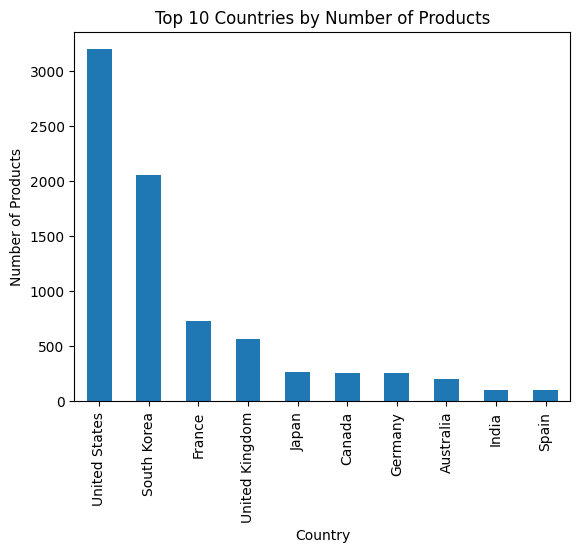

In [81]:
df["country"].value_counts().head(10).plot(
    kind="bar",
    title="Top 10 Countries by Number of Products"
)

plt.ylabel("Number of Products")
plt.xlabel("Country")
plt.show()


# Product type distribution

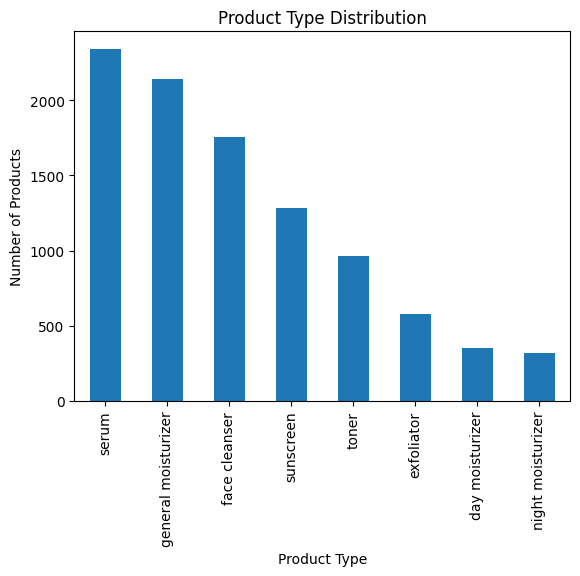

In [82]:
df["type"].value_counts().plot(
    kind="bar",
    title="Product Type Distribution"
)

plt.ylabel("Number of Products")
plt.xlabel("Product Type")
plt.show()


# Top brands

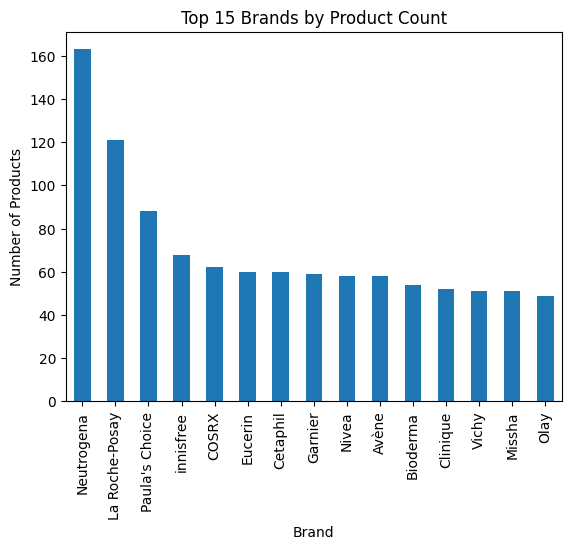

In [83]:
df["brand"].value_counts().head(15).plot(
    kind="bar",
    title="Top 15 Brands by Product Count"
)

plt.ylabel("Number of Products")
plt.xlabel("Brand")
plt.show()


# Ingredient count distribution

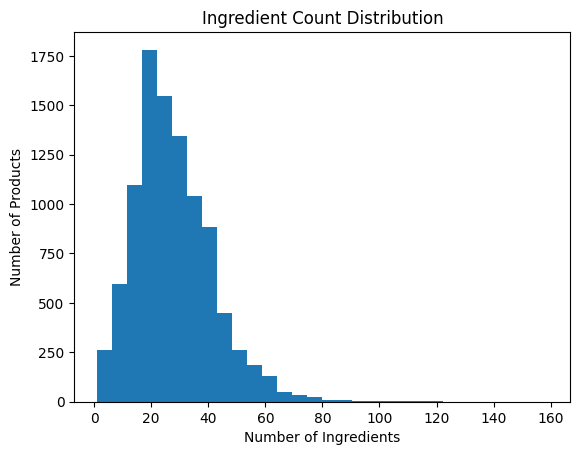

In [84]:
df["ingredient_count"].plot(
    kind="hist",
    bins=30,
    title="Ingredient Count Distribution"
)

plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Products")
plt.show()


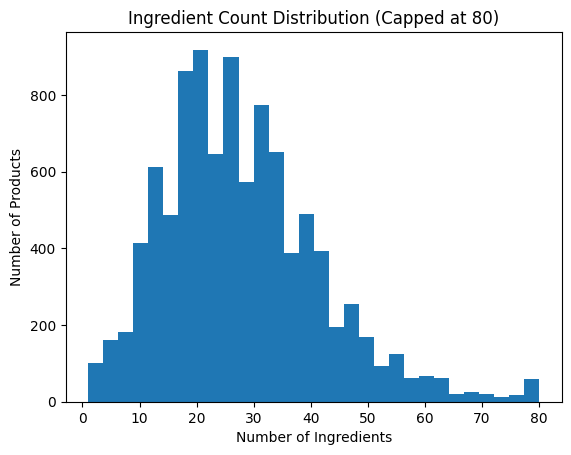

In [85]:
df["ingredient_count"].clip(upper=80).plot(
    kind="hist",
    bins=30,
    title="Ingredient Count Distribution (Capped at 80)"
)

plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Products")
plt.show()


# Top ingredients

In [86]:
top_ingredients = (
    df["ingredient_list"]
    .explode()
    .value_counts()
    .head(20)
)

top_ingredients


ingredient_list
Water                           8456
Glycerin                        7567
Phenoxyethanol                  4284
Butylene Glycol                 3992
Ethylhexylglycerin              3838
Xanthan Gum                     3297
Sodium Hyaluronate              3250
Disodium EDTA                   3176
Parfum                          3084
Tocopherol                      3019
Citric Acid                     2896
Caprylyl Glycol                 2704
2-Hexanediol                    2634
Propanediol                     2439
Panthenol                       2168
Tocopheryl Acetate              2063
Sodium Hydroxide                2060
Niacinamide                     2047
Caprylic/Capric Triglyceride    2027
Dimethicone                     2017
Name: count, dtype: int64

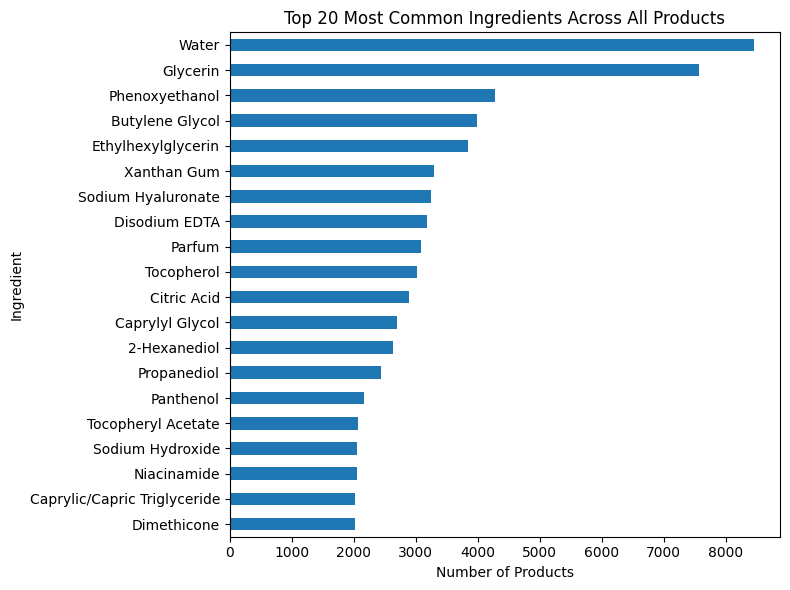

In [87]:
top_ingredients.sort_values().plot(
    kind="barh",
    figsize=(8, 6),
    title="Top 20 Most Common Ingredients Across All Products"
)

plt.xlabel("Number of Products")
plt.ylabel("Ingredient")
plt.tight_layout()
plt.show()


The most common ingredients across all products are base solvents, preservatives,
and stabilizers, which is expected for cosmetic formulations.
Widely used active ingredients such as niacinamide and panthenol also appear
frequently, indicating their broad applicability across product categories.

# Top ingredients per product type

In [88]:
df.explode("ingredient_list") \
  .groupby("type")["ingredient_list"] \
  .value_counts() \
  .groupby(level=0) \
  .head(5)


type                 ingredient_list   
day moisturizer      Glycerin               322
                     Water                  315
                     Phenoxyethanol         220
                     Parfum                 177
                     Xanthan Gum            171
exfoliator           Water                  514
                     Glycerin               420
                     Phenoxyethanol         268
                     Parfum                 199
                     Ethylhexylglycerin     193
face cleanser        Water                 1590
                     Glycerin              1399
                     Citric Acid            757
                     Parfum                 708
                     Phenoxyethanol         681
general moisturizer  Glycerin              1902
                     Water                 1891
                     Phenoxyethanol         990
                     Butylene Glycol        971
                     Ethylhexylglycerin     934


# Claim diversity per product type

In [89]:
def count_claims(x):
    if x is None:
        return 0
    return len(x)
df["n_claims"] = df["claimed_concerns"].apply(count_claims)


In [90]:
df["n_claims"].describe()


count    9735.000000
mean        6.586030
std         3.779462
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        17.000000
Name: n_claims, dtype: float64

<Axes: title={'center': 'Claim Diversity per Product'}, ylabel='Frequency'>

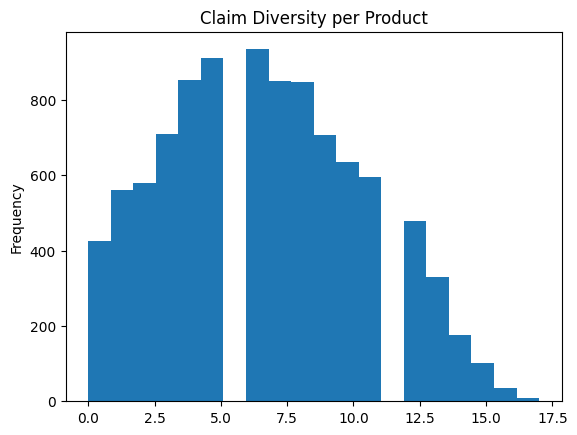

In [91]:
df["n_claims"].plot(
    kind="hist",
    bins=20,
    title="Claim Diversity per Product"
)


# Claim diversity by product type

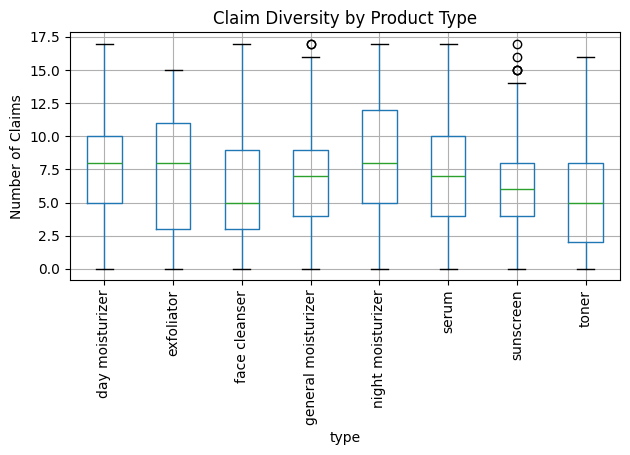

In [92]:
df.boxplot(
    column="n_claims",
    by="type",
    rot=90
)
plt.title("Claim Diversity by Product Type")
plt.suptitle("")
plt.ylabel("Number of Claims")
plt.tight_layout()


In [93]:
df_claims = df[["type", "claimed_concerns"]].explode("claimed_concerns")
df_claims = df_claims.dropna(subset=["claimed_concerns"])


In [94]:
typical_claims = (
    df_claims
    .groupby(["type", "claimed_concerns"])
    .size()
    .reset_index(name="count")
)


In [95]:
top5 = typical_claims.sort_values(["type", "count"], ascending=[True, False]).groupby("type").head(5)

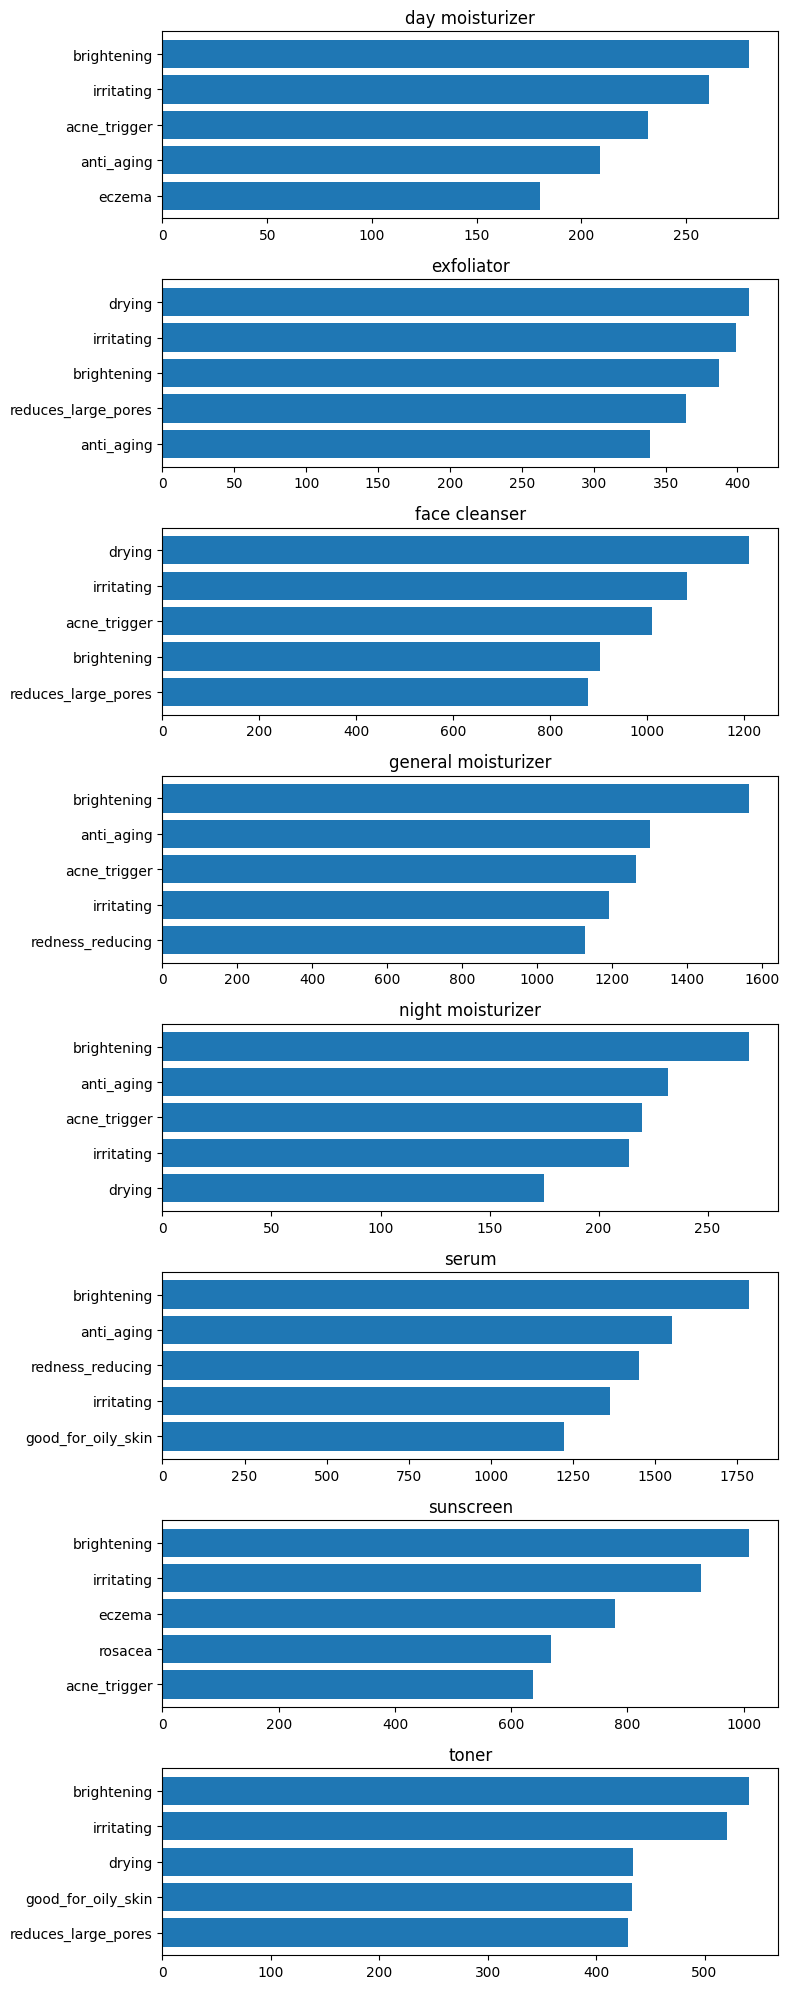

In [96]:
types = top5["type"].unique()

fig, axes = plt.subplots(
    nrows=len(types),
    ncols=1,
    figsize=(8, 2.5 * len(types)),
    sharex=False
)

for ax, t in zip(axes, types):
    data = top5[top5["type"] == t]
    ax.barh(data["claimed_concerns"], data["count"])
    ax.set_title(t)
    ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [97]:
typical_claims[
    (typical_claims["type"] == "night moisturizer") &
    (typical_claims["claimed_concerns"] == "drying")
]


,type,claimed_concerns,count
73,night moisturizer,drying,175


In [ ]:
claim_comp = (df.groupby("type")[["positive_claims", "negative_claims", "condition_claims"]].sum())
claim_comp_pct = claim_comp.div(claim_comp.sum(axis=1), axis=0)


<Axes: title={'center': 'Claim Composition by Product Type'}, xlabel='type'>

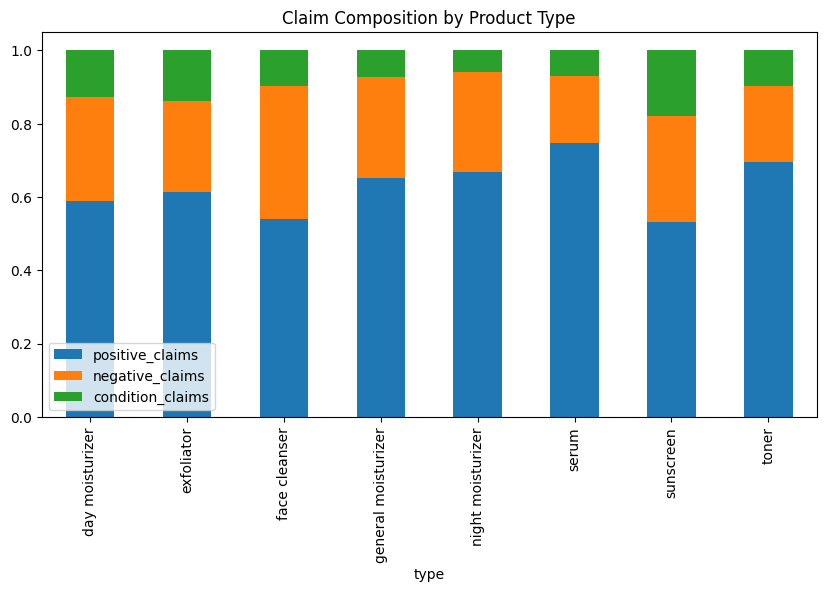

In [99]:
claim_comp_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 5),
    title="Claim Composition by Product Type"
)


>  **Parquet list normalization required**
>
> After loading data from Parquet, list-like columns (e.g. `ingredient_list`, `claimed_concerns`)
> may be returned as `numpy.ndarray` instead of Python `list`.
> This happens silently and can break downstream logic (`explode`, `len`, `isinstance`) without errors.
>
> **Always normalize list columns immediately after `read_parquet`.**
